#Projeto da Disciplina Tópicos Especiais II (C318)

###### Curso: Fundamentos de Machine Learning
###### Alunas: Marines Lopes e Rafaela Papale
###### Professor: Ricardo Augusto

End-to-End Machine Learning Project - Análise e Modelagem - Dataframe: survey lung cancer

-------------------------------------------------------------------------------------------------------------------------------

##### Objetivo: Prever se um paciente tem câncer de pulmão ou possui tendência a ter essa doença com bases em alguns dados coletados do sistema online de previsão de câncer de pulmão do site.

##### Regras de Negócio:

- É possível prever que uma pessoa possa possuir cancer de pulmão com base em dados médicos de forma automatizada, sem supervisão profissional?

- Qual é o principal sintoma do câncer de pulmão?

- Qual a principal doença recorrente em quem tem cancer de pulmão?

- Existe uma tendência maior em algum gênero ou faixa etária?

##### Tipo de problema: Classificação Binária

##### Enquadramento:
Aprendizagem supervisionada, pois a saída é conhecida.

## Importação de dados e bibliotecas

##### Ações a serem tomadas antes de executar as importações necessárias:

-Executar o comando abaixo para dowload da biblioteca klib

-Incluir o arquivo surveylungcancer (.csv) nos arquivos do notebook

In [486]:
!pip install klib
!pip install imbalanced-learn
!pip install collection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##### Bibliotecas utilizadas no projeto

In [487]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import klib
from sklearn.model_selection import StratifiedKFold 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

##### Importação da base de dados

In [488]:
# Especificando o diretório para carregamento do arquivo (.csv)
df = pd.read_csv('surveylungcancer.csv')

In [489]:
#Printando o dataset
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


Obtendo informações sobre o dataframe:

In [490]:
# Informações sobre o dataframe (atributo info)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

##### Informações sobre o dataset:

Contexto: 
A eficácia do sistema de previsão de câncer ajuda as pessoas a conhecer seu risco de câncer com baixo custo e também ajuda as pessoas a tomar a decisão apropriada com base em seu status de risco de câncer. Os dados são coletados do sistema online de previsão de câncer de pulmão.

Atributos:

| Atributo | Descrição | Valores |
|--- |--- |--- |
|Gender| Gênero | M(male)/F(female)|
|Age| Faixa etária abordada na pesquisa |Age of the patient|
|Smoking| Indica se é fumante |YES=2/NO=1|
|Yellow fingers| Dedos amarelos |YES=2/NO=1|
|Anxiety| Ansiedade |YES=2/NO=1|
|Peer_pressure| Pressão dos paes, termo usado para indicar o ato de fazer algo por causa da pressão de outros|YES=2/NO=1|
|Chronic Disease| Doença crônica |YES=2/NO=1|
|Fatigue| Fadiga |YES=2/NO=1|
|Allergy| Alergia |YES=2/NO=1|
|Wheezing|Termo médico que faz referência ao sitoma de chiado no peito |YES=2/NO=1|
|Alcohol| Indica se o indivíduo ingere alcool|YES=2/NO=1|
|Coughing| Tosse |YES=2/NO=1|
|Shortness of Breath|Falta de ar |YES=2/NO=1|
|Swallowing Difficulty|Dificuldade para engolir |YES=2/NO=1|
|Chest pain| Dor no peito |YES=2/NO=1|
|Lung Cancer| Indica se o individuo tem câncer de pulmão ou não |YES/NO|

## Informações iniciais 

Gerando estatisticas em cima das variáveis não binárias, que neste caso, é apenas a variável idade (AGE).

In [491]:
# Descrição estatística do atributo AGE
df.AGE.describe()

count    309.000000
mean      62.673139
std        8.210301
min       21.000000
25%       57.000000
50%       62.000000
75%       69.000000
max       87.000000
Name: AGE, dtype: float64

Observações:
- Média de idade das pessoas que participaram da pesquisa é igual a 63 anos.
- A idade mínima de um paciente foi 21 anos
- A idade máxima de um paciente foi 87 anos
- 25% da população analisada possui 57 anos
- 75% da população analisada possui 69 anos

Levantando variações de resultados das variáveis categóricas:

In [492]:
# Verificando as variáveis categóricas
print(" Legenda: YES=2 , NO=1.")
print('----------------------------')
generos = df["GENDER"].value_counts()
print(generos)
print('----------------------------')
smoking = df["SMOKING"].value_counts()
print(smoking)
print('----------------------------')
yellow_fingers = df["YELLOW_FINGERS"].value_counts()
print(yellow_fingers)
print('----------------------------')
anxiety = df["ANXIETY"].value_counts()
print(anxiety)
print('----------------------------')
peer_pressure = df["PEER_PRESSURE"].value_counts()
print(peer_pressure)
print('----------------------------')
chronic_disease = df["CHRONIC DISEASE"].value_counts()
print(chronic_disease)
print('----------------------------')
fatigue = df["FATIGUE "].value_counts()
print(fatigue)
print('----------------------------')
allergy = df["ALLERGY "].value_counts()
print(allergy)
print('----------------------------')
wheezing = df["WHEEZING"].value_counts()
print(wheezing)
print('----------------------------')
alcohol_consuming = df["ALCOHOL CONSUMING"].value_counts()
print(alcohol_consuming)
print('----------------------------')
coughing = df["COUGHING"].value_counts()
print(coughing)
print('----------------------------')
shortness_of_breath = df["SHORTNESS OF BREATH"].value_counts()
print(shortness_of_breath)
print('----------------------------')
swallowing_difficulty = df["SWALLOWING DIFFICULTY"].value_counts()
print(swallowing_difficulty)
print('----------------------------')
chest_pain = df["CHEST PAIN"].value_counts()
print(chest_pain)


 Legenda: YES=2 , NO=1.
----------------------------
M    162
F    147
Name: GENDER, dtype: int64
----------------------------
2    174
1    135
Name: SMOKING, dtype: int64
----------------------------
2    176
1    133
Name: YELLOW_FINGERS, dtype: int64
----------------------------
1    155
2    154
Name: ANXIETY, dtype: int64
----------------------------
2    155
1    154
Name: PEER_PRESSURE, dtype: int64
----------------------------
2    156
1    153
Name: CHRONIC DISEASE, dtype: int64
----------------------------
2    208
1    101
Name: FATIGUE , dtype: int64
----------------------------
2    172
1    137
Name: ALLERGY , dtype: int64
----------------------------
2    172
1    137
Name: WHEEZING, dtype: int64
----------------------------
2    172
1    137
Name: ALCOHOL CONSUMING, dtype: int64
----------------------------
2    179
1    130
Name: COUGHING, dtype: int64
----------------------------
2    198
1    111
Name: SHORTNESS OF BREATH, dtype: int64
----------------------------
1

É importante ressaltar que a feature Fadiga foi a que mais apresentou divergência na quantidade de pessoas que possui e que não possui essa doença crônica (208 não possui e 101 possui). E isso pode acabar impactando na resposta do modelo e até mesmo na corelação da feature com a variável target.

Levando isso da feature Fadiga em consideração, é imprescindível analisar a variável target a fim de validar se o classificador não tende a ficar inclinado a uma resposta específica:

In [493]:
df["LUNG_CANCER"].value_counts()

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64

Concluindo: Os resultados não estão bem ditribuidos em termos de quantidade e com essa distribuição o classificador poderá ser tendencioso.

Plotando histograma da variável idade em cima de uma amostra da população total:

Text(0, 0.5, 'Quantidade de pessoas')

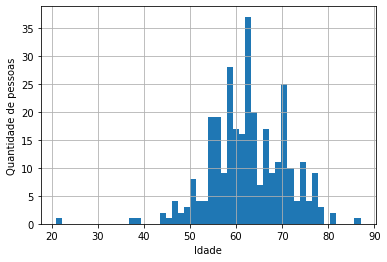

In [494]:
# Histograma plotado em cima da quantidade de pessoas
df['AGE'].hist(bins = 50)
plt.xlabel('Idade')
plt.ylabel('Quantidade de pessoas')

É apresentada uma estimativa empírica (em cima da amostra), a fim de apresentar a variação da quantidade de pessoas presentes de acordo com a idade de cada uma.

Agora utilizando a biblioteca Klib, podemos mostrar a Densidade de Probabilidade da População e sair de uma estimativa empírica:

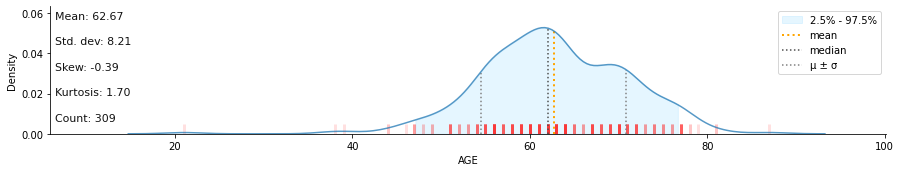

In [495]:
#Dispersão da variável Age
klib.dist_plot(df['AGE'])

É possivel a partir disso:
- Realizar inferências estatísticas
- Verificar o quão assimétrico estão os dados (skew)
- Verificar o quão achatada se encontra a distribuição (Kurtosis)
- Verificar a média de idade

Ainda podemos estender a análise da densidade de probabilidade para apenas quem possui câncer de pulmão:

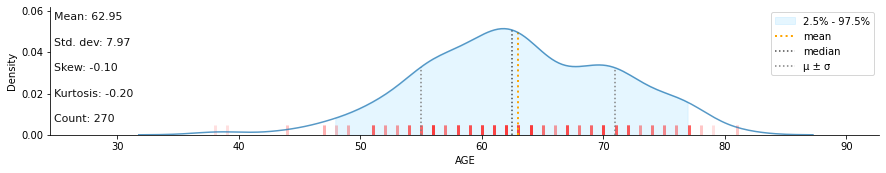

In [496]:
#Dispersão da variável Age, para pessoas que possuem câncer de pulmão
df_positive = df[(df['LUNG_CANCER']=='YES')]
klib.dist_plot(df_positive['AGE'])

 - A média de idade das pessoas que possuem câncer de pulmão é de 63 anos
 - 270 pessoas possuem essa condição

Para as pessoas que não possuem câncer de pulmão:

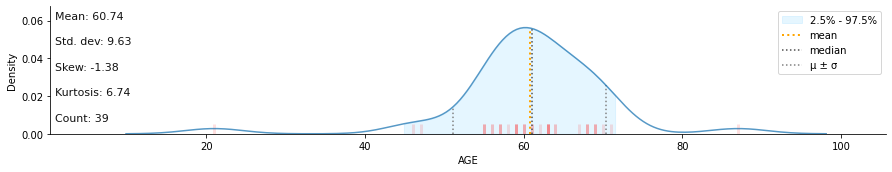

In [497]:
#Dispersão da variável Age, para pessoas que não possuem câncer de pulmão
df_negative = df[(df['LUNG_CANCER']=='NO')]
klib.dist_plot(df_negative['AGE'])

- A média de idade das pessoas que não possuem câncer de pulmão é de 61 anos.
- 39 pessoas não apresentam a doença

## Preparação dos Dados - Manipulando features categóricas (ordinal encoder)

Com exceção da variável idade ('AGE'), todas outras são variáveis categóricas.
Portanto, os valores 1(NO)/2(YES), NO/YES, M(Male)/F(Female) foram convertidos para 1 e 0.


In [498]:
df = df.replace(['M','F',1,2,'YES','NO'],(1,0,0,1,1,0))
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


## Amostragem 

A amostragem é um ponto crítico para um projeto de ML. Ela afeta diretamente na generalização do modelo que será construído.

Essa etapa consiste em separar o conjunto de dados de treino e teste.

Dados de treinamento: são usados para treinar o modelo.

Dados de teste: são usados para comprovar que aquele modelo realmente funciona. (Serão apresentados ao modelo após a sua criação, simulando previsões reais que o modelo realizará, permitindo assim que o desempenho do modelo seja verificado.)

O método de amostragem empregada nesse projeto foi a amostragem aleatória simples, usando a função do SciKit Learn train_test_split.
Assim, 10% do conjunto de dados foram reservados para teste e o restante para treino. Essa seleção é feita de forma aleatória, mas com a semente do gerador de número aleatório com o valor em 63 (um valor fixo escolhido pela equipe). De forma que ao executar o código novamente, os conjuntos permaneçam os mesmos.


In [499]:
#%% Método de Amostragem Aleatória Simples (Sklearn)
# Função do scikit-learn train_test_split
train_set, test_set = train_test_split(df, test_size = 0.3, random_state = 63)

# SMOT AQUI
# Aplicação do smot somente no conjunto de treino 

In [500]:
from collections import Counter
from imblearn.over_sampling import SMOTE 

X = train_set.iloc[:, 0:15].to_numpy()

y = train_set.loc[:, 'LUNG_CANCER'].to_numpy()
print('Original dataset shape %s' % Counter(y))

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X, y)
print('Resampled dataset shape %s' %Counter(y_train))

Original dataset shape Counter({1: 188, 0: 28})
Resampled dataset shape Counter({1: 188, 0: 188})


In [501]:
# print(f"Tamanho conjunto de treino: {len(train_set)}")
print(f"Tamanho conjunto de teste: {len(test_set)}")

Tamanho conjunto de treino: 216
Tamanho conjunto de teste: 93


## Investigando Correlações

Será analisado o dataframe de treino. Objetivo de conhecer o dados e detectar as melhores variáveis para se trabalhar.

Para realizar a análise exploratória dos dados foi utilizado o coeficiente de correlação de Pearson (p).

Esse coeficiente de correlação assume valores de -1 a 1, medindo apenas correlações lineares. 

Quando o coeficiente está próximo de 1, significa que existe uma forte correlação positiva. 

Quando o coeficiente está próximo de -1, significa que existe uma forte correlação negativa. 

Finalmente, coeficientes próximos de 0 significam que não há correlação linear.



In [502]:
#Correlação das variáveis do dataframe
correlation_matrix = train_set.corr(method='pearson')

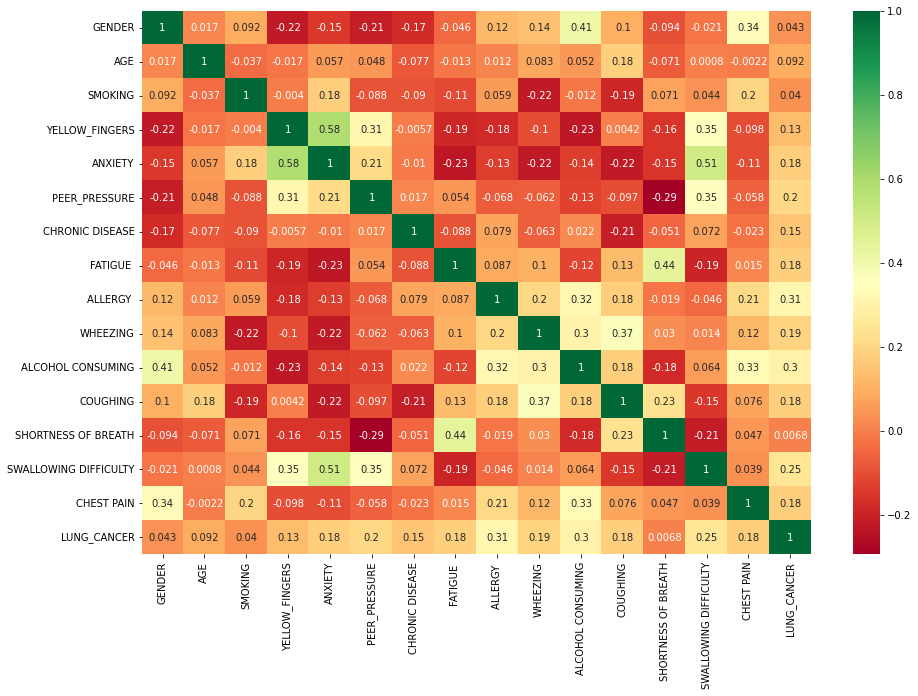

In [503]:
plt.figure(figsize=(15,10))
top_corr_features = correlation_matrix.index
sns.heatmap(correlation_matrix[top_corr_features],annot=True,cmap="RdYlGn")

Aqui está a matriz de correlação para nosso conjunto de treino. Então temos a correlação de cada variável com todos outras.

Podemos desconsiderar a diagonal principal, porque é a correlação da variável com ela mesma, por isso igual a 1.

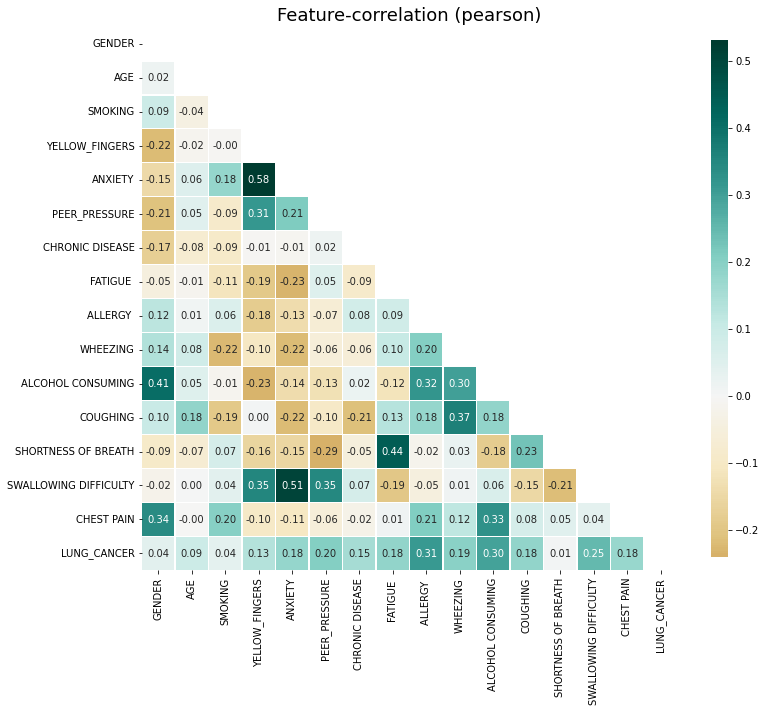

In [504]:
klib.corr_plot(train_set)

Nessa outra imagem, temos uma versão simplificada da matriz de correlação, eliminando valores duplicados* e a diagonal principal.

*Exemplo: Correlação entre Idade e Gênero e a correlação entre Gênero e Idade.

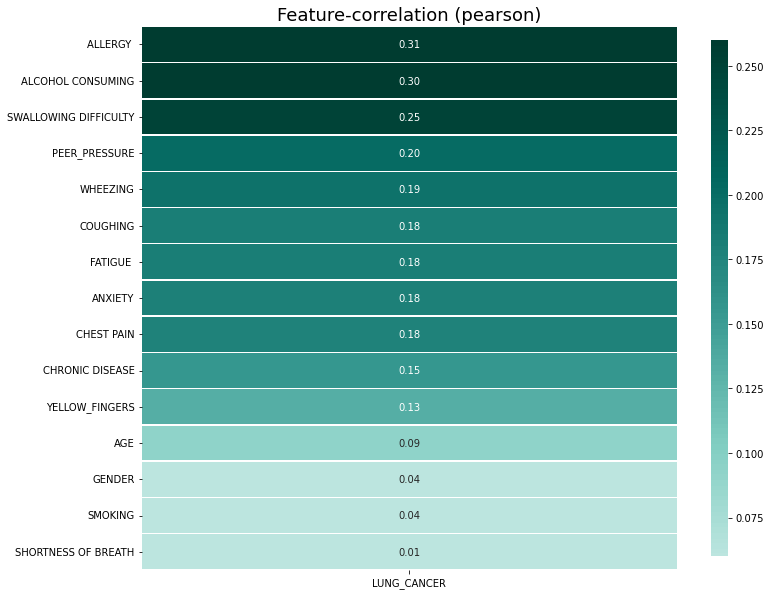

In [505]:
klib.corr_plot(train_set, target='LUNG_CANCER')

### Modelagem

Um classificador random forest pode ser utilizado para computar a importância das features.

Random Forest é um algoritmo de aprendizado de máquina popular que pertence à técnica de aprendizado supervisionado. Ele pode ser usado para problemas de Classificação e Regressão em ML. É baseado no conceito de ensemble learning, que é um processo de combinação de vários classificadores para resolver um problema complexo e melhorar o desempenho do modelo.

In [506]:
# X_train = train_set.iloc[:, 0:15].to_numpy()

# y_train = train_set.loc[:, 'LUNG_CANCER'].to_numpy()

In [507]:
feature_names = [f"feature {i}" for i in range(X_train.shape[1])]
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)

RandomForestClassifier()

RandomForestClassifier é um estimador que ajusta vários classificadores de árvore de decisão em várias sub amostras do conjunto de dados e usa a média para melhorar a precisão preditiva e o sobreajuste de controle. 

As vantagens de se usar esse método: são consideradas um método altamente preciso e robusto devido ao número de árvores de decisão que participam do processo, não sofre do problema de overfitting, o algoritmo pode ser usado em problemas de classificação e regressão.

In [508]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

In [509]:
importances

array([0.01647706, 0.08370714, 0.02021352, 0.03433732, 0.06032918,
       0.09259004, 0.05514524, 0.07551151, 0.135609  , 0.04966003,
       0.13429154, 0.06630276, 0.0272679 , 0.09237395, 0.0561838 ])

In [510]:
ts = train_set
ts = ts.drop(columns=['LUNG_CANCER'])

Text(0, 0.5, 'FEATURE NAMES')

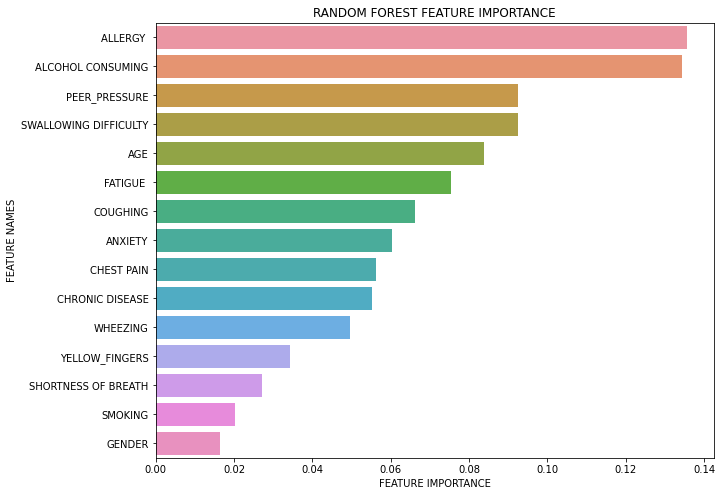

In [511]:
#Create arrays from feature importance and feature names
feature_importance = np.array(importances)
feature_names = np.array(ts.columns)

#Create a DataFrame using a Dictionary
data = {'feature_names':feature_names,'feature_importance':feature_importance }
fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
plt.figure(figsize=(10,8))
#Plot Searborn bar chart
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
plt.title('RANDOM FOREST FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

Feature Importance se refere a uma classe de técnicas pra atribuir pontuações a recursos de entrada de um modelo preditivo que indica a importância relativa entre cada um dos recursos ao fazer uma previsão.
A pontuação do feature importance pode ser calculada por problemas que envolvem predição de valores numéricos, chamados regressão e de problemas que envolvem a predição de toda uma classe, chamada classificação.

No nosso trabalho estamos usando a classificação.

A feature importe permite que tenhamos uma melhor visão sobre aquele conjunto de dados, sobre o modelo e que a predição em si melhore.

O Feature Importance então vem nos falar o quão importante a variável é para a realização da predição.



In [512]:
#X_test
X_test = test_set.iloc[:, 0:15].to_numpy()
#Y_test
y_test = test_set.loc[:, 'LUNG_CANCER'].to_numpy()
#Train the model using the training sets  
var = forest.fit(X_train,y_train) 
y_pred=forest.predict(X_test)

In [513]:
array_test = var.predict_proba(X_test)

Aqui foi-se usada a função predict_proba. 

Ela retorna as probabilidades de pertencer a classe na forma de um array.

Com ela conseguimos prever, individualmente, a probabilidade do indivíduo ter ou não câncer de pulmão, em porcentagem.
Ou seja, com base na análise do seguinte gráfico, o primeiro indivíduo tem 97% de chances de ter câncer de pulmão. Fazendo assim que ele pertença a classe, por isso o número 1. Enquanto o quarto indivíduo tem apenas 16% de chance de ter a doença, portanto não pertence a classe.

In [514]:
df_with_array_test = pd.DataFrame(array_test,columns=['%NaoTer','%Ter'])

In [515]:
df_with_array_test['LUNG_CANCER'] = y_test
df_with_array_test

,%NaoTer,%Ter,LUNG_CANCER
0,0.000,1.000,1
1,0.020,0.980,1
2,0.010,0.990,1
3,0.060,0.940,1
4,0.978,0.022,0
...,...,...,...
88,0.030,0.970,1
89,0.200,0.800,0
90,0.000,1.000,1
91,0.020,0.980,1


### Avaliação de Desempenho

Avaliação de desempenho dos dados.

O RMSE trata de uma medida que calcula a raiz quadrática media dos erros entre os valores reais e as predições. 
Com o uso dessa métrica, nós obtivemos um resultado satisfatório em relação ao desempenho do trabalho.

In [516]:
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.20739033894608505

### Validação com Confusion Matrix

A Confusion Matrix trata de uma tabela onde conseguimos identificar os tipos de classificação do modelo de classificação binário. 
Com ela, nós conseguimos facilmente calcular valores como acurácia, especificidade, sensibilidade, etc.

In [517]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [518]:
confusion_matrix(y_test, y_pred)

array([[ 8,  3],
       [ 1, 81]])

Os verdadeiros negativos (tn) são observações cujo valor real é positivo e o valor previsto também, ou seja, o modelo acertou.

In [519]:
tn

8

Os falsos positivos (fp) são casos em que o resultado correto é negativo, mas o resultado obtido é positivo, então o modelo errou.

In [520]:
fp

3

Os falsos negativos (fn) são casos em que o resultado correto é positivo, mas o resultado obtido é negativo, então o modelo também errou.

In [521]:
fn

1

Os verdadeiros positivos que são observações cujo valor real é positivo e o valor previsto é positivo, ou seja, o modelo acertou.

In [522]:
tp

81

Para analisarmos o quão bem o modelo está fazendo as classificações vamos utilizar as métricas de avaliação: Acurácia, Sensibilidade e Especificidade.

In [523]:
total = tn + fp + fn + tp
accuracy = (tn + tp) / total

accuracy

0.956989247311828

In [524]:
recall = tp / (tp + fn)

recall

0.9878048780487805

In [525]:
specificity = tn / (tn + fp)

specificity

0.7272727272727273